X_train_full.shape=(60000, 28, 28); y_train_full.shape=(60000,); X_test.shape=(10000, 28, 28); y_test.shape=(10000,);


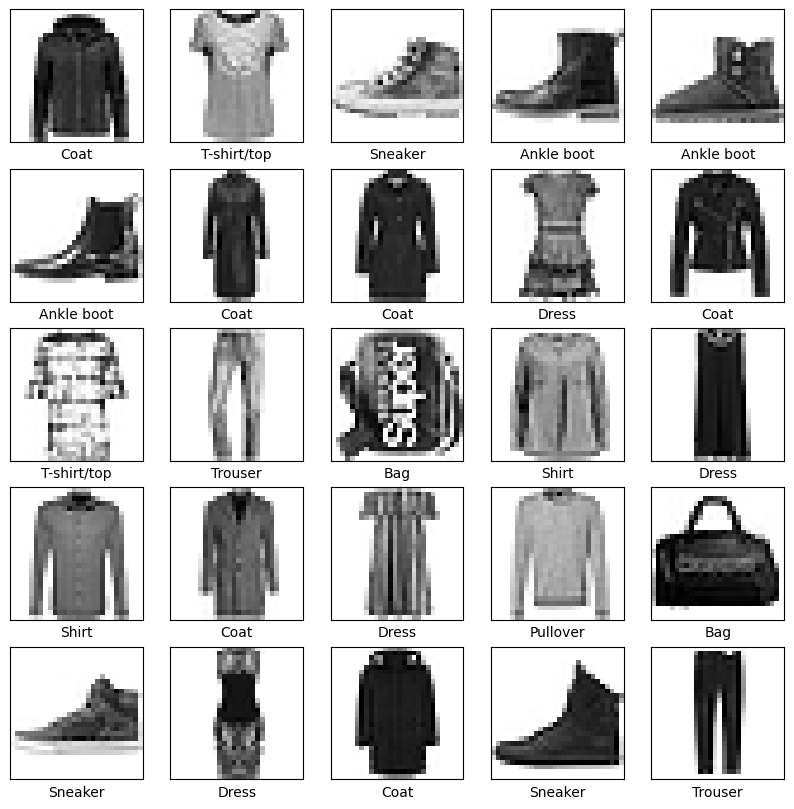

In [32]:
from tensorflow import keras

import matplotlib.pyplot as plt

# Load Fashion MNIST
# train = training dataset
# valid = validation dataset (during training)
# test = testing dataset (after training)
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
print(f"{X_train_full.shape=}; {y_train_full.shape=}; {X_test.shape=}; {y_test.shape=};")

X_train, X_valid = X_train_full[5000:] / 255.0, X_train_full[:5000] / 255.0
y_train, y_valid = y_train_full[5000:], y_train_full[:5000]
X_test = X_test / 255.0

# This is apparently a well-known list of classes
# My textbook had exactly the same line as ChatGPT
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Visualize some of the training data
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([]) # no x ticks
    plt.yticks([]) # no y ticks
    plt.imshow(X_train[i], cmap='binary')
    plt.xlabel(class_names[y_train[i]])

In [40]:
from tensorflow.keras import layers

# A sequential neural network using Keras
model = keras.Sequential()
model.add(layers.Flatten(input_shape=[28, 28]))
model.add(layers.Dense(300, activation="relu"))
model.add(layers.Dense(100, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

# Print a summary of this sequential model
model.summary()
hiddenLayer = model.layers[1]
weights, biases = hiddenLayer.get_weights()
print(f"{weights.shape=}; {biases.shape=};")

# Compile the model to set loss function, training algorithm, and metrics to report
# loss:
#    * sparse = the encoding of the output classification is a single integer instead of a 1-hot array
#    * categorical = this is a classificaton/categorization model
#    * crossentropy = we are calculating loss as sum(y_true * log(y_pred)) which means we ignore predicted probability
#         for cases where the y_true = 0, and then the closer y_pred is to 1.0 the closer to 0 the loss will be. Otherwise,
#         the log(y_pred) will be a large negative number the closer to 0.0 the y_pred is.
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

training_history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 300)               235500    
                                                                 
 dense_16 (Dense)            (None, 100)               30100     
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
weights.shape=(784, 300); biases.shape=(300,);
Epoch 1/30
1719/1719 [==============================] - 5s 2ms/step - loss: 0.7252 - accuracy: 0.7631 - val_loss: 0.5052 - val_accura

<Axes: >

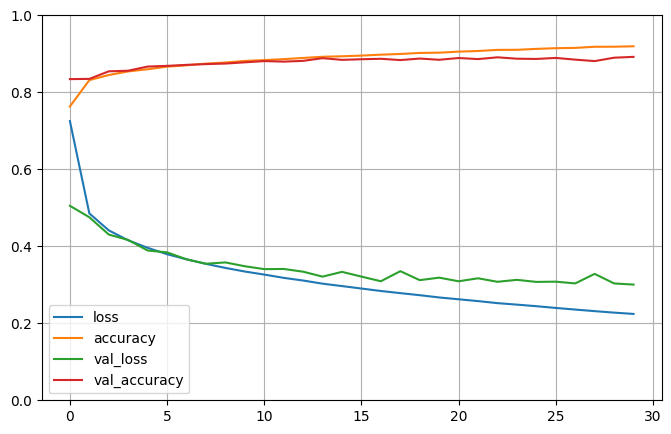

In [43]:
import pandas as pd

# Visualize the loss and accuracy over training epochs
pd.DataFrame(training_history.history).plot(figsize=(8, 5), grid=True, ylim=(0, 1))

In [44]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3439 - accuracy: 0.8818


[0.3438638150691986, 0.8817999958992004]

1/1 [==============================] - 0s 20ms/step
pred=array([9.3650573e-07, 4.8543939e-08, 3.4510308e-06, 7.5740545e-06,
       5.7015234e-07, 4.6198073e-04, 3.0512892e-06, 4.7045541e-03,
       2.5897587e-04, 9.9455887e-01], dtype=float32); max_index=9; max_pred=0.9945589;
1/1 [==============================] - 0s 32ms/step
pred=array([1.0947551e-04, 1.0517459e-08, 9.9546558e-01, 6.1294081e-10,
       4.3394333e-03, 7.4684996e-13, 8.5596177e-05, 8.6279126e-12,
       1.7013626e-08, 1.3067036e-12], dtype=float32); max_index=2; max_pred=0.9954656;
1/1 [==============================] - 0s 20ms/step
pred=array([3.6752059e-05, 9.9996161e-01, 7.1909803e-08, 1.2074693e-06,
       3.6572274e-07, 5.2595146e-13, 3.1720511e-08, 2.0237403e-09,
       1.2051557e-08, 1.0949812e-13], dtype=float32); max_index=1; max_pred=0.9999616;
1/1 [==============================] - 0s 21ms/step
pred=array([1.1018261e-05, 9.9994648e-01, 2.1565917e-07, 4.0340768e-05,
       8.4419162e-07, 2.1492934e-10, 9.806

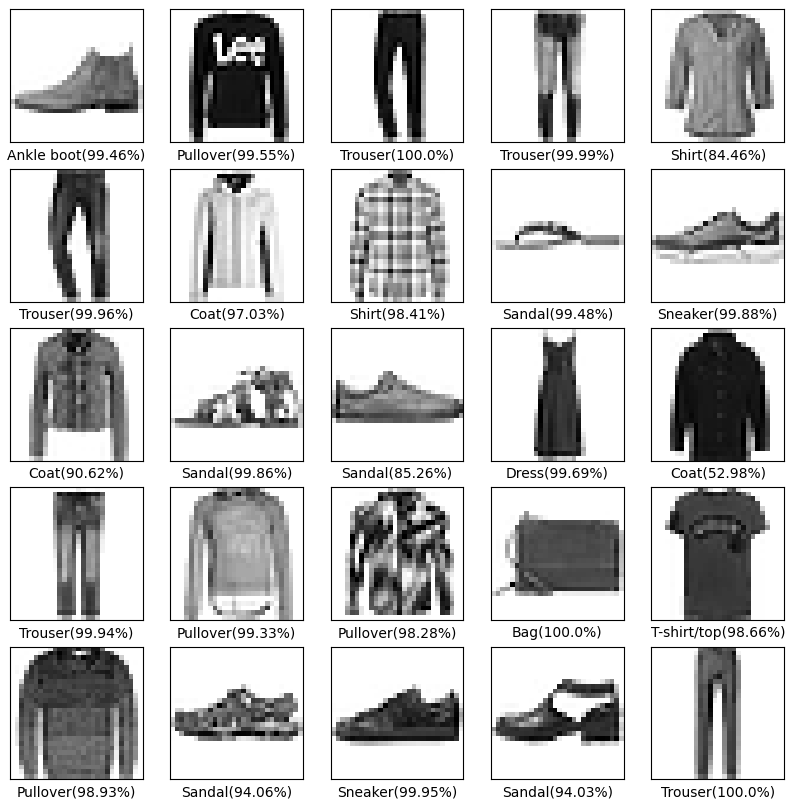

In [54]:
# Visualize the classifcations over some of the test data
def select_prediction(pred):
    max_pred = 0.0
    max_index = -1
    for i in range(len(pred)):
        if (pred[i] > max_pred):
            max_pred = pred[i]
            max_index = i
    # print(f"{pred=}; {max_index=}; {max_pred=};")
    return (max_index, max_pred)

plt.figure(figsize=(10, 10))
for i in range(25):
    prediction = model.predict(X_test[i].reshape(1, 28, 28))
    class_pred, class_probability = select_prediction(prediction[0])

    plt.subplot(5, 5, i+1)
    plt.xticks([]) # no x ticks
    plt.yticks([]) # no y ticks
    plt.imshow(X_test[i], cmap='binary')
    plt.xlabel(f"{class_names[class_pred]}({round(class_probability * 100.0, 2)}%)")